In [2]:
import numpy as np

In [3]:
from sympy import Matrix as m
x=np.array([[1.0,2],[2,1],[3,3]])
m(x)

Matrix([
[1.0, 2.0],
[2.0, 1.0],
[3.0, 3.0]])

In [4]:
from numpy.linalg import svd
u,e,vt=svd(x,full_matrices=False)
e

array([5.19615242, 1.        ])

In [5]:
m(u)

Matrix([
[-0.408248290463863,   0.707106781186547],
[-0.408248290463863,  -0.707106781186548],
[-0.816496580927726, 2.4980018054066e-16]])

In [11]:
E=np.diag(e)
m(E)

Matrix([
[5.19615242270663,   0],
[               0, 1.0]])

In [12]:
m(vt)

Matrix([
[-0.707106781186548, -0.707106781186547],
[-0.707106781186547,  0.707106781186548]])

In [13]:
x1=u@E@vt

In [14]:
m(x1)

Matrix([
[1.0,               2.0],
[2.0, 0.999999999999999],
[3.0,               3.0]])

In [15]:
x1=np.round(x1)

In [16]:
m(x1)

Matrix([
[1.0, 2.0],
[2.0, 1.0],
[3.0, 3.0]])

In [17]:
x2=e[0]*u[:,0:1]@vt[0:1,:]+e[1]*u[:,1:2]@vt[1:2,:]
m(x2)

Matrix([
[1.0,               2.0],
[2.0, 0.999999999999999],
[3.0,               3.0]])

In [ ]:
!pip install pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1

In [ ]:
!pip install tqdm

In [ ]:
!pip install skillsnetwork

In [18]:
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
from numpy.linalg import svd
from sympy import Matrix
from os import listdir, getcwd
from os.path import isfile, join
from random import randint
from PIL import Image
from sklearn.decomposition import TruncatedSVD

In [19]:
# covert an image into a design matrix
def get_data(mypath):
    cwd = getcwd()
    mypath = join(cwd,mypath)
    files = [join(mypath,f) for f in listdir(mypath) if isfile(join(mypath, f)) and f.startswith(".")==False]
    # Read image
    img = Image.open(files[0])
    I = np.array(img)
    
    Length, Width = I.shape
    X = np.zeros((len(files),Length*Width))
    for i,file in enumerate(files):
        img = Image.open(file)
        I = np.array(img)
        X[i, :] = I.reshape(1, -1) #converting I to 1-D array
    return X, Length, Width

In [20]:
c=getcwd()
a=join(c,'peds')
listdir(a)

['frame_1.jpg',
 'frame_10.jpg',
 'frame_100.jpg',
 'frame_101.jpg',
 'frame_102.jpg',
 'frame_103.jpg',
 'frame_104.jpg',
 'frame_105.jpg',
 'frame_106.jpg',
 'frame_107.jpg',
 'frame_108.jpg',
 'frame_109.jpg',
 'frame_11.jpg',
 'frame_110.jpg',
 'frame_111.jpg',
 'frame_112.jpg',
 'frame_113.jpg',
 'frame_114.jpg',
 'frame_115.jpg',
 'frame_116.jpg',
 'frame_117.jpg',
 'frame_118.jpg',
 'frame_119.jpg',
 'frame_12.jpg',
 'frame_120.jpg',
 'frame_121.jpg',
 'frame_122.jpg',
 'frame_123.jpg',
 'frame_124.jpg',
 'frame_125.jpg',
 'frame_126.jpg',
 'frame_127.jpg',
 'frame_128.jpg',
 'frame_129.jpg',
 'frame_13.jpg',
 'frame_130.jpg',
 'frame_131.jpg',
 'frame_132.jpg',
 'frame_133.jpg',
 'frame_134.jpg',
 'frame_135.jpg',
 'frame_136.jpg',
 'frame_137.jpg',
 'frame_138.jpg',
 'frame_139.jpg',
 'frame_14.jpg',
 'frame_140.jpg',
 'frame_141.jpg',
 'frame_142.jpg',
 'frame_143.jpg',
 'frame_144.jpg',
 'frame_145.jpg',
 'frame_146.jpg',
 'frame_147.jpg',
 'frame_148.jpg',
 'frame_149.jpg',

In [21]:
from zipfile import ZipFile
import skillsnetwork

dataset = ["boats.zip", "peds.zip", "traffic.zip"]
for i in dataset:
    await skillsnetwork.download_dataset(str("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IND-GPXX09KMEN/labs/data/" + i))
    
    with ZipFile(i, "r") as zip_object:
        zip_object.extractall()

Exception: Failed to read dataset at 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IND-GPXX09KMEN/labs/data/boats.zip'.

In [22]:
X = np.array([[1, 2], [2, 4], [4, 8.0001]])

Matrix(X)

Matrix([
[1.0,    2.0],
[2.0,    4.0],
[4.0, 8.0001]])

In [23]:
U, s, VT = svd(X, full_matrices=False)
S = np.diag(s)
Matrix(S)

Matrix([
[10.2470288381327,                   0],
[               0, 2.18216227635671e-5]])

In [24]:
X_hat = np.round(s[0]*U[:, 0:1]@VT[0:1, :])

Matrix(X_hat)

Matrix([
[1.0, 2.0],
[2.0, 4.0],
[4.0, 8.0]])

In [25]:
L = 1
Xhat = U[:, :L]@S[0:L, 0:L]@VT[:L, :]

Matrix(Xhat)

Matrix([
[0.999992380977777, 2.00000380947483],
[ 1.99998476195556, 4.00000761894966],
[ 4.00000952368254, 8.00009523820408]])

In [26]:
svd_ = TruncatedSVD(n_components=1, random_state=42)

In [27]:
Z = svd_.fit_transform(X)
Matrix(Z)

Matrix([
[2.23606797748356],
[4.47213595496713],
[8.94436135282372]])

In [28]:
Xhat = svd_.inverse_transform(Z)
Matrix(np.round(Xhat))

Matrix([
[1.0, 2.0],
[2.0, 4.0],
[4.0, 8.0]])

In [29]:
X, Length, Width = get_data(mypath='peds')

In [30]:
X.shape, Length, Width

((170, 35264), 152, 232)

In [24]:
X

array([[ 88.,  73.,  90., ..., 160., 162., 165.],
       [ 86.,  75.,  89., ..., 162., 161., 163.],
       [ 84.,  75.,  91., ..., 161., 164., 167.],
       ...,
       [ 86.,  73.,  92., ..., 161., 164., 166.],
       [ 86.,  74.,  90., ..., 161., 163., 167.],
       [ 84.,  75.,  92., ..., 162., 164., 167.]])

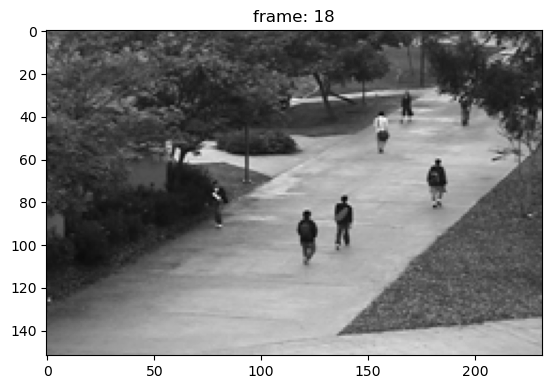

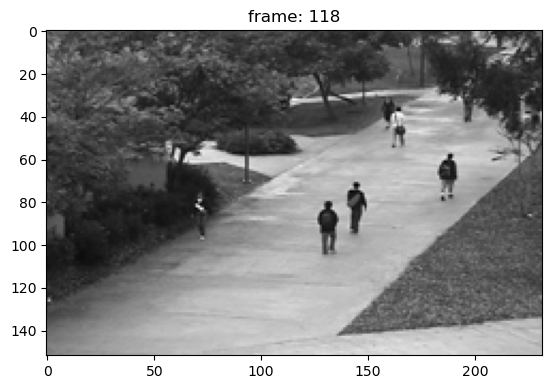

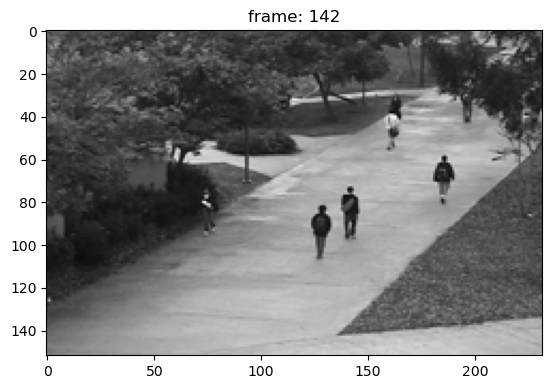

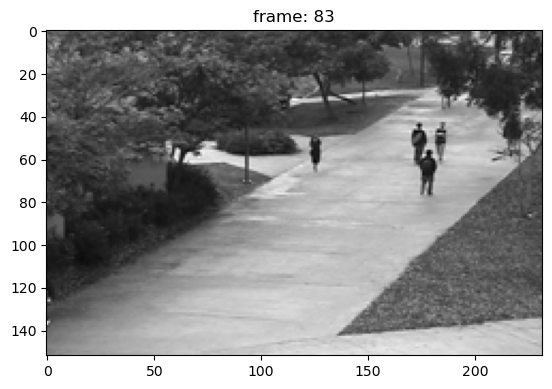

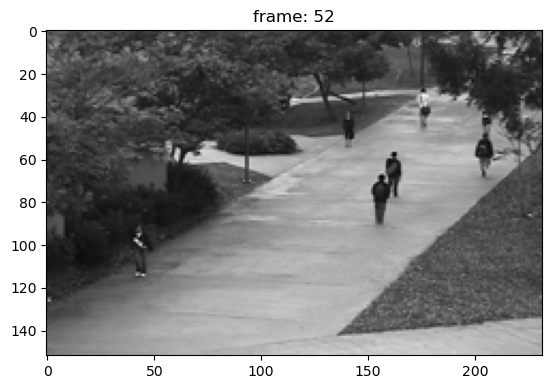

In [31]:
for i in range(5):
    frame=randint(0, X.shape[0]-1)
    plt.imshow(X[randint(0, X.shape[0]-1),:].reshape(Length,Width),cmap='gray')
    plt.title("frame: "+str(frame))
    plt.show()

In [32]:
U, s, VT = svd(X, full_matrices=False)
S = np.diag(s)

In [35]:
L = 12
Xhat = U[:, :L]@S[0:L, 0:L]@VT[:L, :]

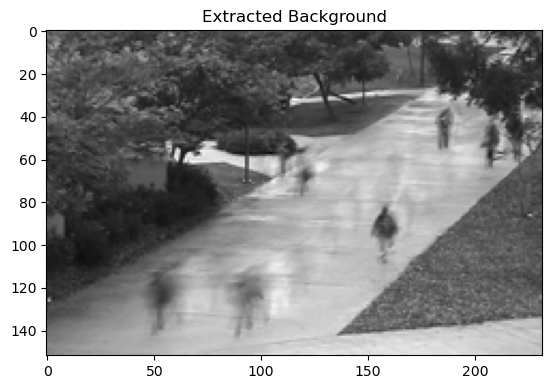

In [36]:
plt.imshow(Xhat[0,:].reshape(Length,Width),cmap="gray")
plt.title('Extracted Background')
plt.show()